<a href="https://colab.research.google.com/github/mdzikrim/DeepLearning/blob/main/Week_4_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Networks

In [1]:
from keras.models import Sequential
from keras.layers import Flatten

model = Sequential()
model.add(Flatten(input_shape=(28, 28))) #index_flat = i * (jumlah kolom) + j

# untuk array 28x28, jumlah kolom = 28. Misal, elemen di posisi (1, 3) bakal punya index:
# 1 * 28 + 3 = 31

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Input Layer

In [2]:
import numpy as np

dummy_input=np.arange(784).reshape(1, 28, 28)
print(dummy_input)

flattened_output=model.predict(np.zeros((1,28,28)))
print(flattened_output[0][:10])

[[[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
    17  18  19  20  21  22  23  24  25  26  27]
  [ 28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44
    45  46  47  48  49  50  51  52  53  54  55]
  [ 56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
    73  74  75  76  77  78  79  80  81  82  83]
  [ 84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100
   101 102 103 104 105 106 107 108 109 110 111]
  [112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
   129 130 131 132 133 134 135 136 137 138 139]
  [140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156
   157 158 159 160 161 162 163 164 165 166 167]
  [168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184
   185 186 187 188 189 190 191 192 193 194 195]
  [196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212
   213 214 215 216 217 218 219 220 221 222 223]
  [224 225 226 227 228 229 230 231 232 233 234 2

In [3]:
import numpy as np
# Bikin dummy image: gradient dari 0 (gelap) ke 255 (terang)
dummy_input = np.linspace(0, 255, num=28*28).reshape(28, 28).astype(np.float32)
# Tambah batch dimension, jadi shape-nya (1, 28, 28)
dummy_input = np.expand_dims(dummy_input, axis=0)

# Jalanin model buat ngeliat output flatten
flattened_output = model.predict(dummy_input)
print(flattened_output[0][:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
[0.        0.3256705 0.651341  0.9770115 1.302682  1.6283525 1.954023
 2.2796936 2.605364  2.9310346]


In [4]:
print("Input sebelum flatten:", dummy_input[0][0][:10])

Input sebelum flatten: [0.        0.3256705 0.651341  0.9770115 1.302682  1.6283525 1.954023
 2.2796936 2.605364  2.9310346]


# Hidden Layers

In [5]:
from keras.layers import Dense
model.add(Dense(512, activation='relu'))

In [6]:
import numpy as np

def relu(x):
    """
    Fungsi ReLU:
    - Kalau x < 0, jadi 0
    - Kalau x == 0, tetap 0
    - Kalau x > 0, jadi x
    """
    return np.where(x > 0, x, 0)

# Contoh input: ada negatif, 0, dan positif
input_vector = np.array([-5.0, -1.0, 0.0, 2.0, 5.0])
output = relu(input_vector)

print("Input:", input_vector)
print("Output setelah ReLU:", output)

Input: [-5. -1.  0.  2.  5.]
Output setelah ReLU: [0. 0. 0. 2. 5.]


# Output Layer

In [7]:
import numpy as np

def softmax(x):
    """
    Fungsi softmax buat ngeubah input vector jadi probabilitas.

    Rumus:
    softmax(x)_i = exp(x_i) / sum(exp(x))

    Pake trick subtract np.max(x) buat stabilitas numerik.
    """
    exps = np.exp(x - np.max(x))
    return exps / np.sum(exps)

# Contoh input vector
input_vector = np.array([2.0, 1.0, 0.1])
output = softmax(input_vector)

print("Input:", input_vector)
print("Output setelah softmax:", output)

Input: [2.  1.  0.1]
Output setelah softmax: [0.65900114 0.24243297 0.09856589]


# Putting it All Together

In [8]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
# Imports a Flatten layer to convert the image matrix into a vector
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

# MLP and CNN Comparison

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.datasets import mnist

In [10]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [11]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [12]:
model_mlp = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

In [13]:
model_mlp.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [14]:
history_mlp = model_mlp.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.8375 - loss: 0.5390 - val_accuracy: 0.9621 - val_loss: 0.1299
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9649 - loss: 0.1169 - val_accuracy: 0.9718 - val_loss: 0.0903
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9765 - loss: 0.0762 - val_accuracy: 0.9731 - val_loss: 0.0883
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9806 - loss: 0.0619 - val_accuracy: 0.9767 - val_loss: 0.0779
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9854 - loss: 0.0478 - val_accuracy: 0.9762 - val_loss: 0.0776
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9844 - loss: 0.0452 - val_accuracy: 0.9777 - val_loss: 0.0781
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9896 - loss: 0.0323 - val_accuracy: 0.9772 - val_loss: 0.0842
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9902 - loss: 0.0289 - val_a

In [15]:
score = model_mlp.evaluate(x_test, y_test, verbose=0)
print('MLP Test loss:', score[0])
print('MLP Test accuracy:', score[1])

MLP Test loss: 0.07322468608617783
MLP Test accuracy: 0.9804999828338623


# Latih Model

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import mnist

In [17]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [18]:
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

In [19]:
model_cnn = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Tes Akurasi

In [20]:
model_cnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [21]:
history_cnn = model_cnn.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 106ms/step - accuracy: 0.8204 - loss: 0.5997 - val_accuracy: 0.9788 - val_loss: 0.0720
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 104ms/step - accuracy: 0.9758 - loss: 0.0783 - val_accuracy: 0.9805 - val_loss: 0.0621
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 106ms/step - accuracy: 0.9837 - loss: 0.0545 - val_accuracy: 0.9858 - val_loss: 0.0460
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 39s 100ms/step - accuracy: 0.9865 - loss: 0.0399 - val_accuracy: 0.9890 - val_loss: 0.0381
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 101ms/step - accuracy: 0.9888 - loss: 0.0340 - val_accuracy: 0.9882 - val_loss: 0.0405
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 102ms/step - accuracy: 0.9918 - loss: 0.0257 - val_accuracy: 0.9877 - val_loss: 0.0421
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 43s 109ms/step - accuracy: 0.9921 - loss: 0.0241 - val_accuracy: 0.9898 - val_loss: 0.0392
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 39s 103ms/step - accuracy: 0.9939 - loss: 0

In [22]:
score = model_cnn.evaluate(x_test, y_test, verbose=0)
print('CNN Test loss:', score[0])
print('CNN Test accuracy:', score[1])

CNN Test loss: 0.026498230174183846
CNN Test accuracy: 0.9926000237464905


# Visualisasi

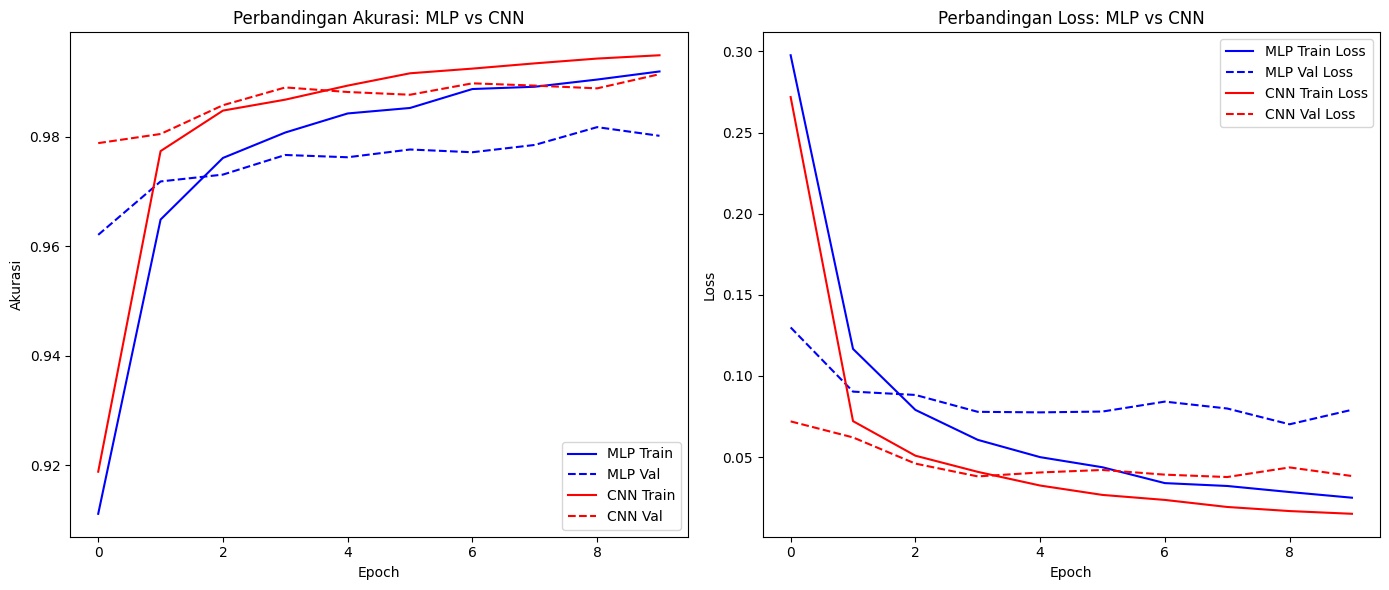

In [23]:
import matplotlib.pyplot as plt

# Grafik Perbandingan Akurasi
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history_mlp.history['accuracy'], 'b-', label='MLP Train')
plt.plot(history_mlp.history['val_accuracy'], 'b--', label='MLP Val')
plt.plot(history_cnn.history['accuracy'], 'r-', label='CNN Train')
plt.plot(history_cnn.history['val_accuracy'], 'r--', label='CNN Val')
plt.title('Perbandingan Akurasi: MLP vs CNN')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

# Grafik Perbandingan Loss
plt.subplot(1, 2, 2)
plt.plot(history_mlp.history['loss'], 'b-', label='MLP Train Loss')
plt.plot(history_mlp.history['val_loss'], 'b--', label='MLP Val Loss')
plt.plot(history_cnn.history['loss'], 'r-', label='CNN Train Loss')
plt.plot(history_cnn.history['val_loss'], 'r--', label='CNN Val Loss')
plt.title('Perbandingan Loss: MLP vs CNN')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()